<a href="https://colab.research.google.com/github/eduvaladao/aulas_escola_cbpf_XIII/blob/main/aula02_XIII_Escola_do_CBPF_muVSz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

<font size="5"> Parâmetros Cosmológicos a partir de Supernovas
    
<font size="2">
    
This notebook was developed by Gabriel Teixeira for the XIII Escola do CBPF (2021)- Curso de Introdução a Cosmologia com Python prof. Clécio R. Bom
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>
    
**Contact:** bernardo@cbpf.br</font>
Adapted example from from <a href="https://www.astroml.org/book_figures/chapter8/fig_nonlinear_mu_z.html"> astroML </a>

<font size="2">

Please do not remove this disclaimer.</font>

In [ ]:
#Adapted example from from https://www.astroml.org/book_figures/chapter8/fig_nonlinear_mu_z.html

!pip install astroML

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astropy.cosmology import LambdaCDM

from astroML.datasets import generate_mu_z
from astroML.plotting.mcmc import convert_to_stdev
from astroML.utils.decorators import pickle_results


     |████████████████████████████████| 105 kB 10.6 MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-py3-none-any.whl size=128673 sha256=8f954cb9361bc6d947e09da3060462534673115caee826c14bc33b3147a89bfa
  Stored in directory: /root/.cache/pip/wheels/d2/65/48/32aab81213722d288c9529e3a6e94cea3f7d6b95b649e6540a
Successfully built astroML


In [ ]:

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate the data
z_sample, mu_sample, dmu = generate_mu_z(1000, z0=0.3,
                                         dmu_0=0.05, dmu_1=0.004,
                                         random_state=1)



In [ ]:

#------------------------------------------------------------
# define a log likelihood in terms of the parameters
#  beta = [omegaM, omegaL]
def compute_logL(beta):
    cosmo = LambdaCDM(H0=71, Om0=beta[0], Ode0=beta[1], Tcmb0=0)
    mu_pred = cosmo.distmod(z_sample).value
    return - np.sum(0.5 * ((mu_sample - mu_pred) / dmu) ** 2)


#------------------------------------------------------------
# Define a function to compute (and save to file) the log-likelihood
@pickle_results('mu_z_nonlinear.pkl')
def compute_mu_z_nonlinear(Nbins=50):
    omegaM = np.linspace(0.05, 0.75, Nbins)
    omegaL = np.linspace(0.4, 1.1, Nbins)

    logL = np.empty((Nbins, Nbins))

    for i in range(len(omegaM)):
        for j in range(len(omegaL)):
            logL[i, j] = compute_logL([omegaM[i], omegaL[j]])

    return omegaM, omegaL, logL


omegaM, omegaL, res = compute_mu_z_nonlinear()
res -= np.max(res)



@pickle_results: computing results and saving to 'mu_z_nonlinear.pkl'


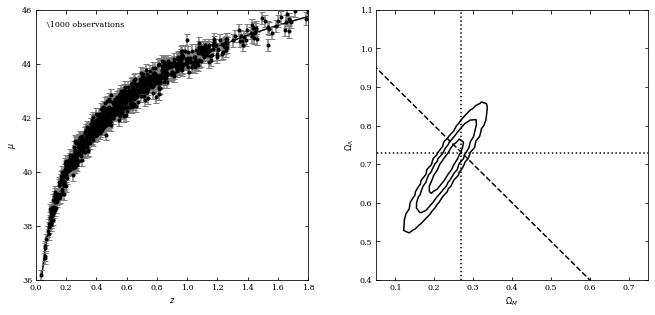

In [ ]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.15, top=0.9)

# left plot: the data and best-fit
ax = fig.add_subplot(121)
whr = np.where(res == np.max(res))
omegaM_best = omegaM[whr[0][0]]
omegaL_best = omegaL[whr[1][0]]
cosmo = LambdaCDM(H0=71, Om0=omegaM_best, Ode0=omegaL_best, Tcmb0=0)

z_fit = np.linspace(0.04, 2, 100)
mu_fit = cosmo.distmod(z_fit).value

ax.plot(z_fit, mu_fit, '-k')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray')

ax.set_xlim(0, 1.8)
ax.set_ylim(36, 46)

ax.set_xlabel('$z$')
ax.set_ylabel(r'$\mu$')

ax.text(0.04, 0.96, "\%i observations" % len(z_sample),
        ha='left', va='top', transform=ax.transAxes)

# right plot: the likelihood
ax = fig.add_subplot(122)

ax.contour(omegaM, omegaL, convert_to_stdev(res.T),
           levels=(0.683, 0.955, 0.997),
           colors='k')

ax.plot([0, 1], [1, 0], '--k')
ax.plot([0, 1], [0.73, 0.73], ':k')
ax.plot([0.27, 0.27], [0, 2], ':k')

ax.set_xlim(0.05, 0.75)
ax.set_ylim(0.4, 1.1)

ax.set_xlabel(r'$\Omega_M$')
ax.set_ylabel(r'$\Omega_\Lambda$')

plt.show()